In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('C:/Users/NON/Desktop/Data science/train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,##,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()



<Figure size 1800x800 with 2 Axes>

In [6]:
df.groupby(['Sex','Survived'])['Survived'].count()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

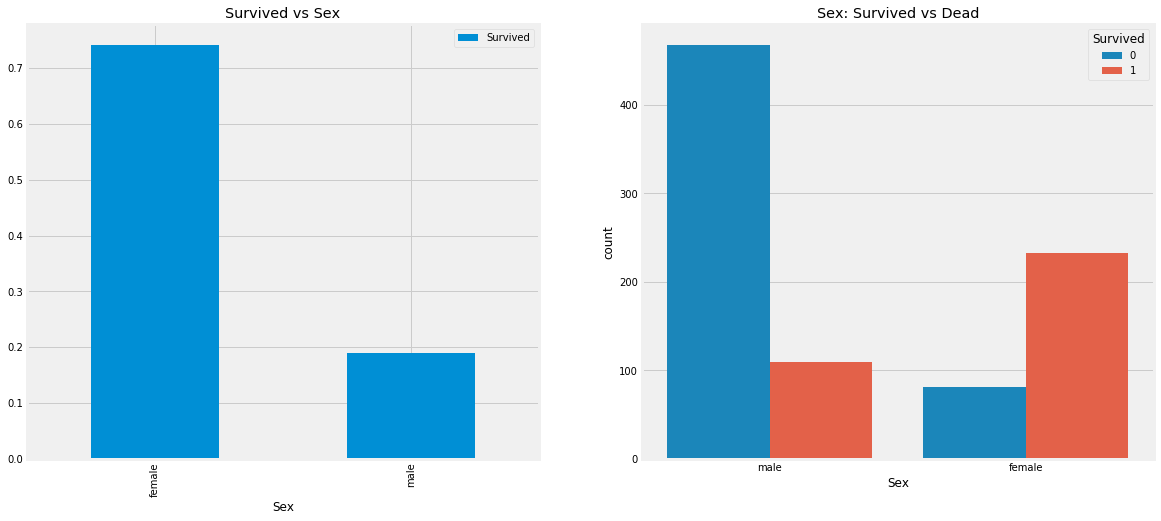

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(df['Sex'],hue=df['Survived'],ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()


In [9]:
pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='summer_r')


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


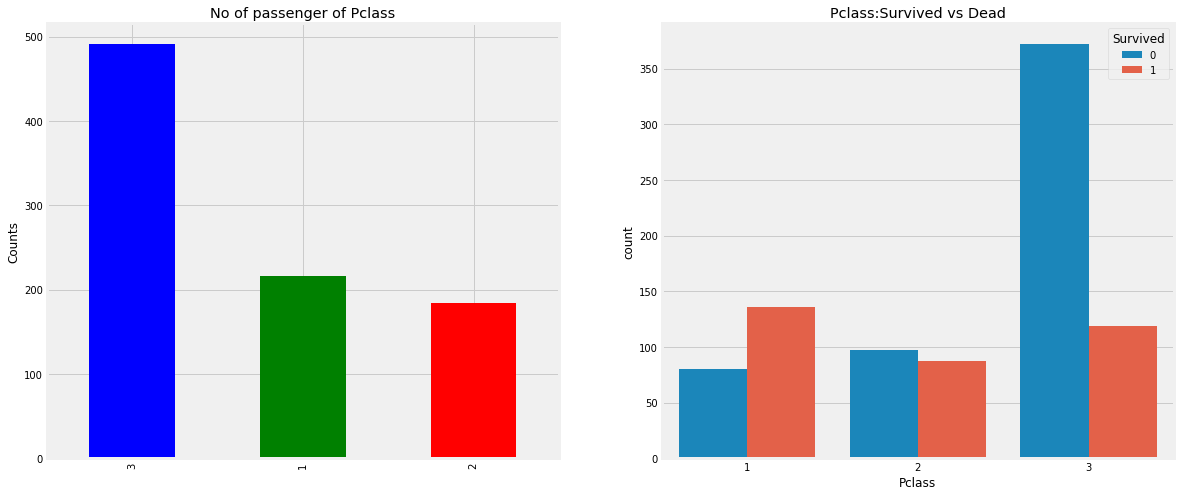

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Pclass'].value_counts().plot.bar(color=['b','g','r'],ax=ax[0])
ax[0].set_title('No of passenger of Pclass')
ax[0].set_ylabel('Counts')
sns.countplot(df['Pclass'],hue=df['Survived'],ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()


In [11]:
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


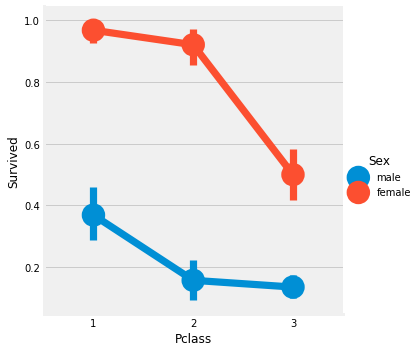

In [12]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df)

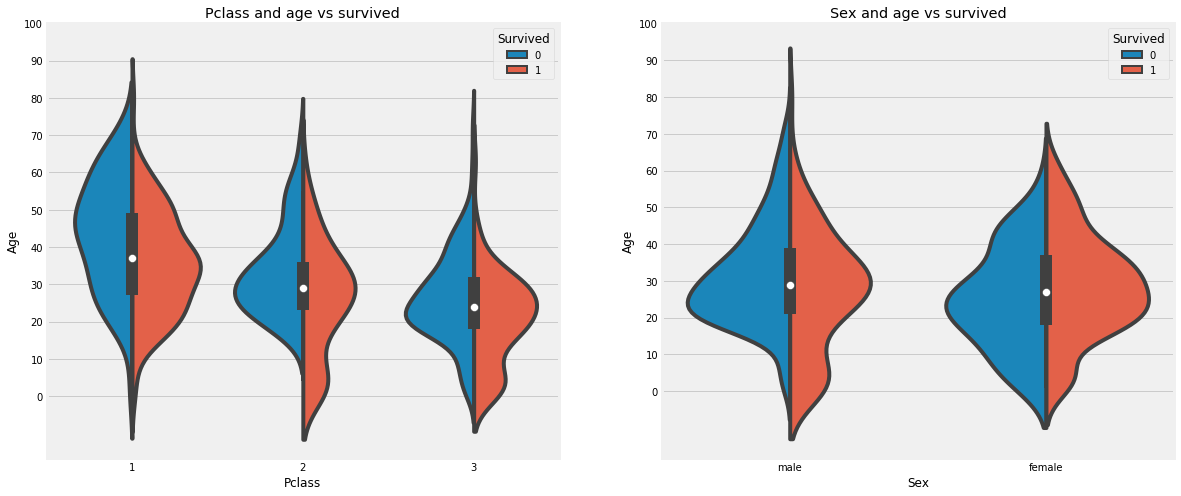

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=df,split=True,ax=ax[0])
ax[0].set_title('Pclass and age vs survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age',hue='Survived',data=df,split=True,ax=ax[1])
ax[1].set_title('Sex and age vs survived')
ax[1].set_yticks(range(0,110,10))
plt.show()
              

In [15]:
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],margins=True).style.background_gradient(cmap='summer_r')

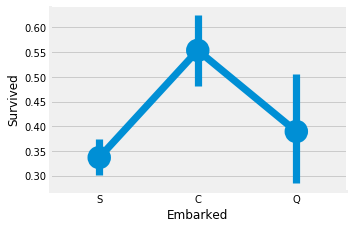

In [19]:
sns.factorplot('Embarked','Survived',data=df)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()


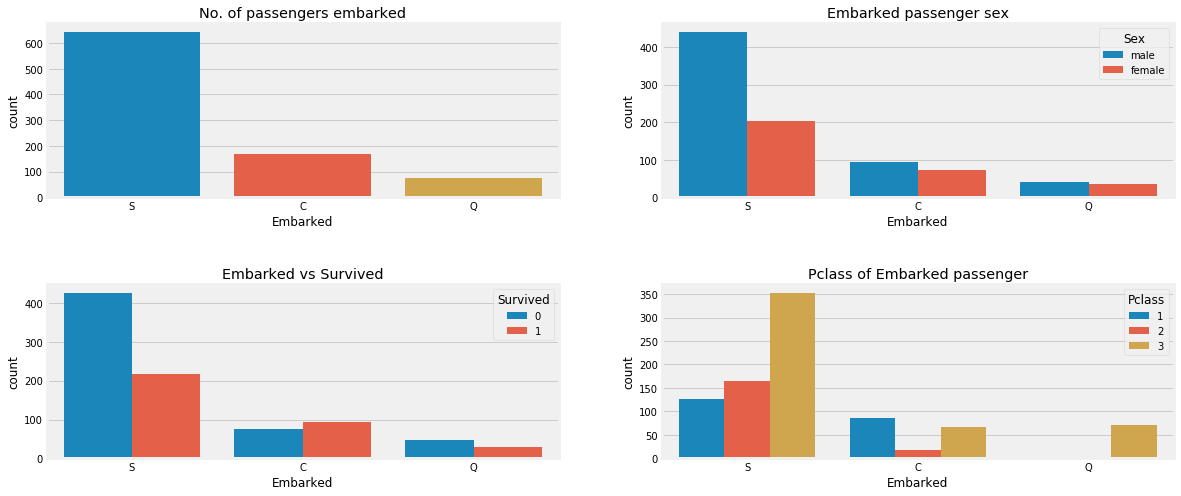

In [23]:
f,ax=plt.subplots(2,2,figsize=(18,8))
sns.countplot('Embarked',data=df,ax=ax[0][0])
ax[0][0].set_title('No. of passengers embarked')
sns.countplot('Embarked',hue='Sex',data=df,ax=ax[0][1])
ax[0][1].set_title('Embarked passenger sex')
sns.countplot('Embarked',hue='Survived',data=df,ax=ax[1][0])
ax[1][0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df,ax=ax[1][1])
ax[1][1].set_title('Pclass of Embarked passenger')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()                               
                               
                               

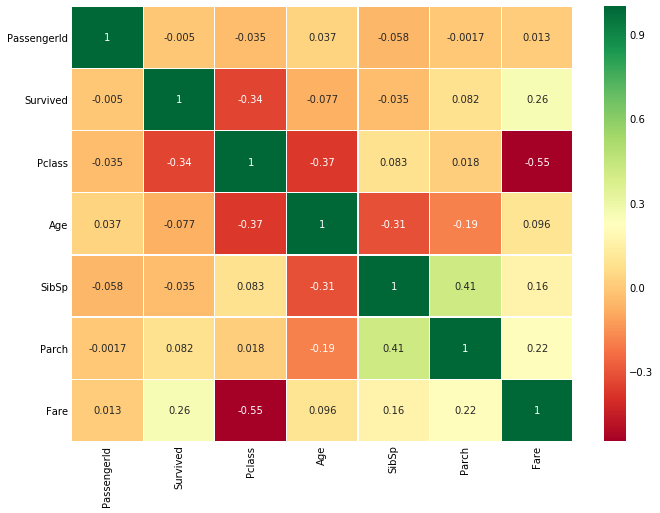

In [25]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()
